In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from compare_tools.chunk_collection import ChunkCollection
from compare_tools.utils import VectorComparison, MTVolume, HTID
import random

In [3]:
# paths used in this notebook
glove_data_path = "/data/vectorfiles/all_Glove_testset.bin"
meta_path = "../../sampling/test_dataset.csv.gz"
rsync_root='/data/extracted-features/'

In [ ]:
corpus = ChunkCollection(glove_data_path, meta_path)

In [ ]:
name = random.sample(list(corpus.htid_lookup), 1)[0]
#name = "njp.32101066909308"
vol = MTVolume(name, corpus)
HTID(name, rsync_root=rsync_root)

In [9]:
neighbors = vol.neighbors(comps_per_item=20, minimum_matches=4)
print(neighbors)

[('nyp.33433090896170', 27), ('osu.32435014595367', 23), ('uc1.b2956704', 12), ('mdp.39015089074333', 11)]


In [10]:
comps = [VectorComparison(name, neighbor[0], corpus, adjusted=True) for neighbor in neighbors]

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 300 results
  r = func(a, **kwargs)


/opt/conda/lib/python3.6/site-packages/altair/utils/core.py:90: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ))


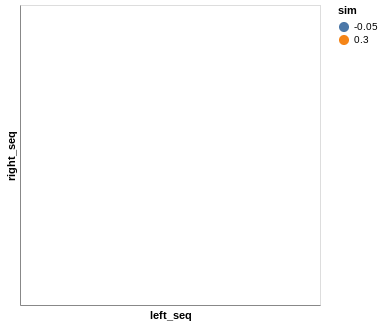

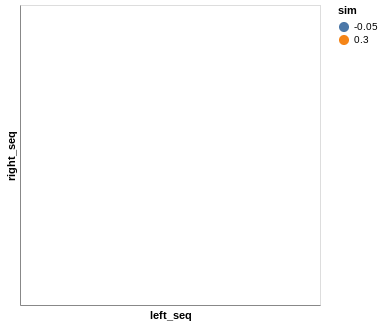

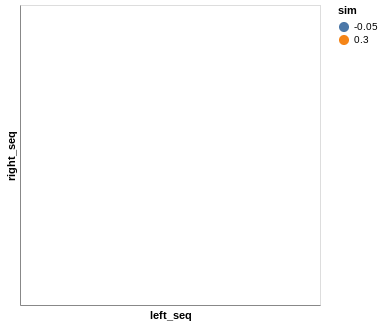

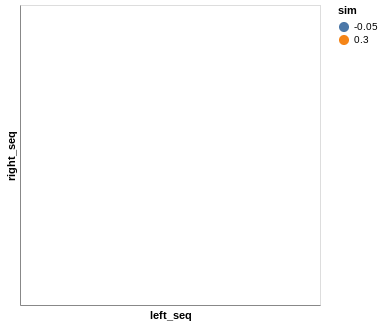

In [13]:
plots = []
for i, comp in enumerate(comps):
    display(HTID(neighbors[i][0], rsync_root=rsync_root))
    comp.assemble_sw_runs(threshold = 0.1)
    p = comp.plot("similarity_matrix", runs = True).properties(width=300, height=300)
    display(p)
    plots.append(p)

The code below automates this procedure over the whole corpus.

In [ ]:
for i, row in enumerate(corpus.metadata.itertuples()):
    vol = MTVolume(row.Index, corpus)
    if i % 25 == 0:
        print(i)
    neighbors = vol.neighbors(comps_per_item=20, minimum_matches=4)
    for neighbor in neighbors:
        comp = VectorComparison(row.Index, neighbor[0], corpus, adjusted=True)
        comp.assemble_sw_runs(threshold = 0.1)
        comp.export_runs("runs.csv")

In [158]:
import altair as alt
alt.vconcat(*plots)#.properties(width=300, height = 300)